In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as snn
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
label_encoder = LabelEncoder()

In [3]:
data = pd.read_csv(r'C:\Adrian\Universidad\8vo Semestre\4. Thu. - Inteligencia Artificial I\Exercises\Bedón, Ramos - Proyecto Final\Deepression.csv')
print(data.isnull().sum())
data

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64


,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cleaned_data = data.dropna()
print(cleaned_data.isnull().sum())

Number               0
Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64


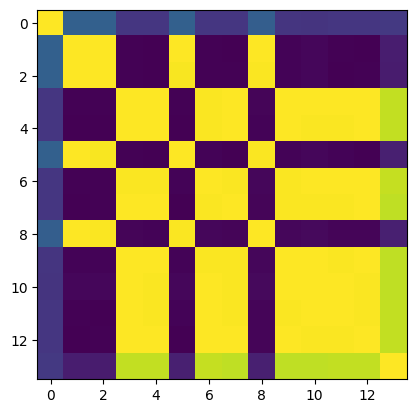

In [5]:
numeric_data = cleaned_data[['Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy']]
plt.imshow(numeric_data.corr())

In [6]:
def mapping(x):
    if "No depression" in x:
        return "No depression"
    if "Mild" in x:
        return "Mild"
    if "Severe" in x:
        return "Severe"
    if "Moderate" in x:
        return "Moderate"
    
cleaned_data['Depression State'] = cleaned_data['Depression State'].apply(mapping)

C:\Users\arbed\AppData\Local\Temp\ipykernel_31616\660209256.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Depression State'] = cleaned_data['Depression State'].apply(mapping)


In [7]:
categorical_data = ["Mild", "Moderate", "Severe", "No depression"]
numerical_data = label_encoder.fit_transform(categorical_data)
print(dict(zip(categorical_data, numerical_data)))

{'Mild': 0, 'Moderate': 1, 'Severe': 3, 'No depression': 2}


In [8]:
one_hot_encoded_data = pd.get_dummies(cleaned_data)

In [9]:
X = cleaned_data.drop('Depression State', axis=1)
X = X.drop('Number ', axis=1)
Y = cleaned_data['Depression State']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

               precision    recall  f1-score   support

         Mild      0.667     0.286     0.400        14
     Moderate      0.250     0.154     0.190        13
No depression      0.297     0.846     0.440        13
       Severe      1.000     0.214     0.353        14

     accuracy                          0.370        54
    macro avg      0.553     0.375     0.346        54
 weighted avg      0.564     0.370     0.347        54



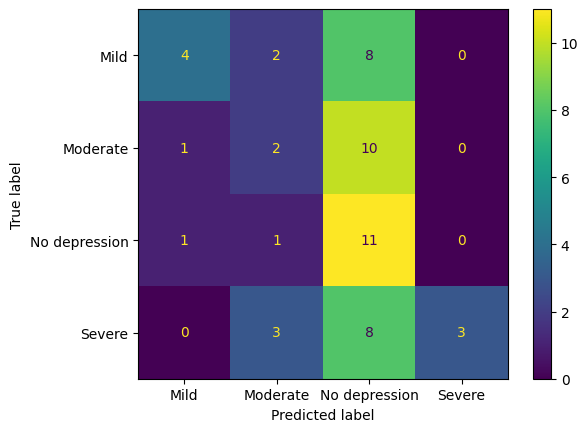

In [11]:
mdl_snn = snn.MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=10000000)
mdl_snn.fit(X_train, Y_train)
Y_pred = mdl_snn.predict(X_test)
prediction_nNetwork = np.array(Y_pred)
print(metrics.classification_report(Y_test, prediction_nNetwork, labels=mdl_snn.classes_, digits=3))
cm =metrics.confusion_matrix(Y_test, prediction_nNetwork, labels=mdl_snn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl_snn.classes_)
disp.plot()

               precision    recall  f1-score   support

         Mild      0.400     0.286     0.333        14
     Moderate      0.308     0.308     0.308        13
No depression      0.200     0.462     0.279        13
       Severe      0.000     0.000     0.000        14

     accuracy                          0.259        54
    macro avg      0.227     0.264     0.230        54
 weighted avg      0.226     0.259     0.228        54



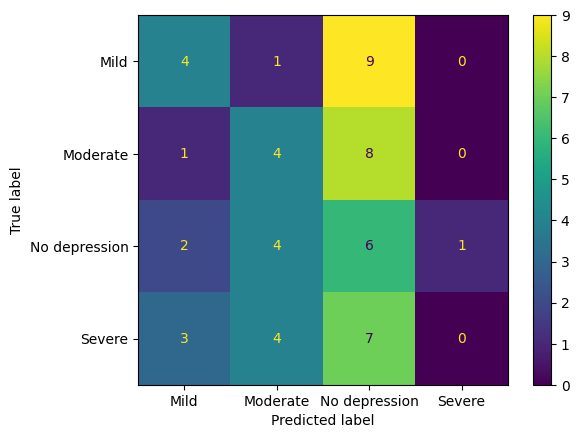

In [12]:
mdl_lrg = LogisticRegression(max_iter=10000000)
mdl_lrg.fit(X_train, Y_train)
Y_pred = mdl_lrg.predict(X_test)
prediction_lRegression = np.array(Y_pred)
print(metrics.classification_report(Y_test, prediction_lRegression, labels=mdl_lrg.classes_, digits=3))
cm =metrics.confusion_matrix(Y_test, prediction_lRegression, labels=mdl_lrg.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl_lrg.classes_)
disp.plot()

               precision    recall  f1-score   support

         Mild      0.250     0.357     0.294        14
     Moderate      0.400     0.154     0.222        13
No depression      0.250     0.231     0.240        13
       Severe      0.235     0.286     0.258        14

     accuracy                          0.259        54
    macro avg      0.284     0.257     0.254        54
 weighted avg      0.282     0.259     0.254        54



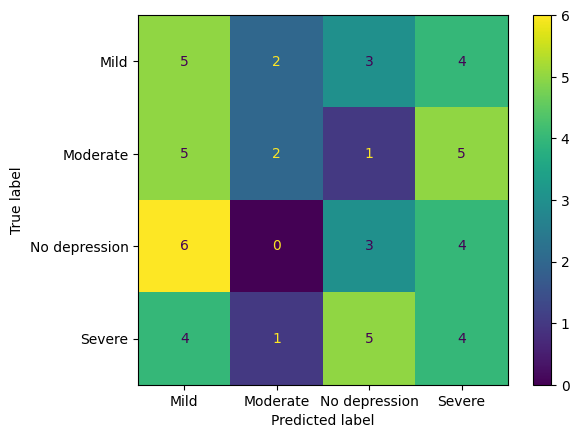

In [13]:
mdl_knn = neighbors.KNeighborsClassifier(n_neighbors=1)
mdl_knn.fit(X_train, Y_train)
Y_pred = mdl_knn.predict(X_test)
prediction_neighbors = np.array(Y_pred)
print(metrics.classification_report(Y_test, prediction_neighbors, labels=mdl_knn.classes_, digits=3))
cm =metrics.confusion_matrix(Y_test, prediction_neighbors, labels=mdl_knn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl_knn.classes_)
disp.plot()

In [14]:
sleep = int(input())
appetite = int(input())
interest = int(input())
fatigue = int(input())
worthlessness = int(input())
concentration = int(input())
agitation = int(input())
suicidal_ideation = int(input())
sleep_disturbance = int(input())
agression = int(input())
panic_attacks = int(input())
hopelessness = int(input())
restlessness = int(input())
low_energy = int(input())

In [15]:
data_dict = {'Sleep': sleep, 
            'Appetite': appetite, 
            'Interest': interest, 
            'Fatigue': fatigue, 
            'Worthlessness': worthlessness, 
            'Concentration': concentration,
            'Agitation': agitation,
            'Suicidal Ideation': suicidal_ideation,
            'Sleep Disturbance': sleep_disturbance,
            'Aggression': agression,
            'Panic Attacks': panic_attacks,
            'Hopelessness': hopelessness,
            'Restlessness': restlessness,
            'Low Energy': low_energy}

data_production = pd.DataFrame(data_dict, index=[0])
data_production

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
0,2,5,5,1,1,5,1,1,5,1,1,1,1,1


In [16]:
Y_pred_lrg = mdl_lrg.predict(data_production)
Y_pred_snn = mdl_snn.predict(data_production)
Y_pred_knn = mdl_knn.predict(data_production)
prediction_lRegression = np.array(Y_pred_lrg)
prediction_nNetwork = np.array(Y_pred_snn)
prediction_nNeighbors = np.array(Y_pred_knn)
print(prediction_lRegression)
print(prediction_nNetwork)
print(prediction_nNeighbors)

['No depression']
['Moderate']
['No depression']
